<h1 style= "text-align: center">Google Playstore Analysis</h1>

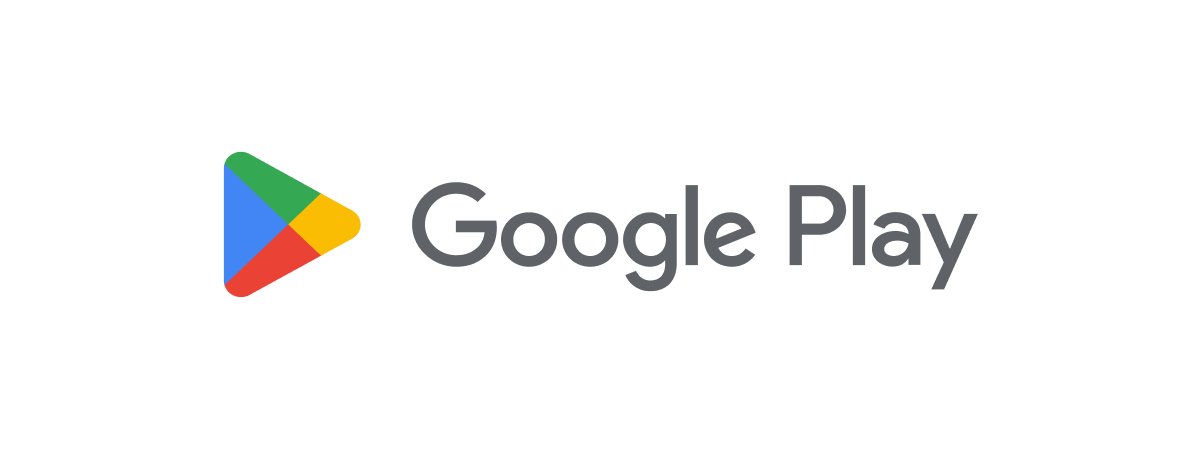

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import squarify
import warnings
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
warnings.filterwarnings('ignore')

In [2]:
filename = "Google-Playstore.csv"
def get_data(filename):
    missing_values = ["n/a", "na", "--", " ", "N/A", "NA"]
    return pd.read_csv(filename,na_values = missing_values,sep=",")
originalDF = get_data(filename)
df = originalDF.copy()
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
df.shape

(2312944, 24)

In [5]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

### Check for missing values

There is missing in data
               column  # of missings
0            App Name              5
1              Rating          22883
2        Rating Count          22883
3            Installs            107
4    Minimum Installs            107
5            Currency            135
6                Size            196
7     Minimum Android           6530
8        Developer Id             36
9   Developer Website         760835
10    Developer Email             31
11           Released          71053
12     Privacy Policy         420953


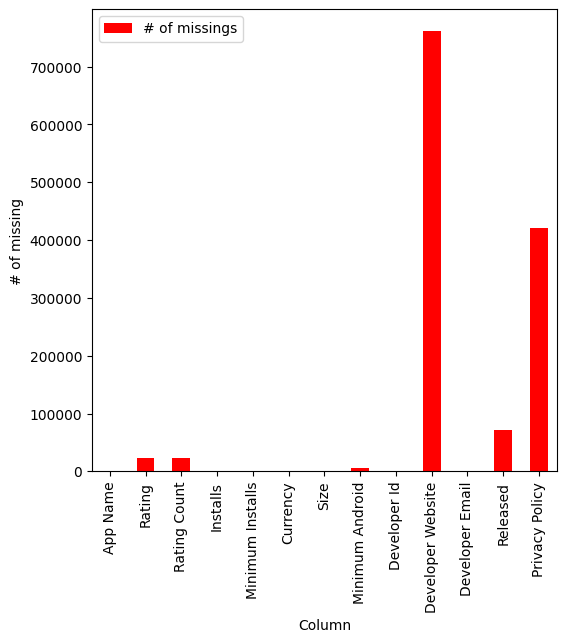

In [6]:
def check_missing(df):
    if df.isnull().values.any() :
        print("There is missing in data")
        names = []
        values = []
        for col_name in df.columns:
            if df[col_name].isnull().any() :
                names.append(col_name)
                values.append(df[col_name].isnull().sum())
            
        missing = {"column":names,
              "# of missings":values}
        missingDf = pd.DataFrame(missing)
        print(missingDf)
        missingDf.plot.bar(x="column",y='# of missings', figsize=(6, 6),ylabel="# of missing",xlabel = "Column",color="red")
        
    else:
        print("Data has no missing values")

            
check_missing(df)

### Drop columns with many missing values

In [7]:
df.drop(['Developer Website','Privacy Policy'], axis=1, inplace=True)

There is missing in data
              column  # of missings
0           App Name              5
1             Rating          22883
2       Rating Count          22883
3           Installs            107
4   Minimum Installs            107
5           Currency            135
6               Size            196
7    Minimum Android           6530
8       Developer Id             36
9    Developer Email             31
10          Released          71053


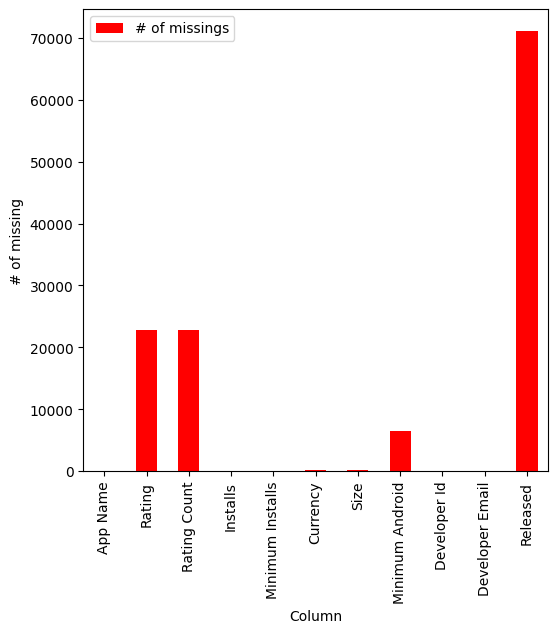

In [8]:
check_missing(df)

### Drop Unnecessary columns

In [9]:
df.drop(['Installs','Minimum Installs','Scraped Time'], axis=1, inplace=True)

### Drop rows with a few # of missing values

In [10]:
df.dropna(subset = ['App Name', 'Developer Id','Developer Email','Released'], inplace=True)

There is missing in data
            column  # of missings
0           Rating            208
1     Rating Count            208
2         Currency             33
3  Minimum Android           6352


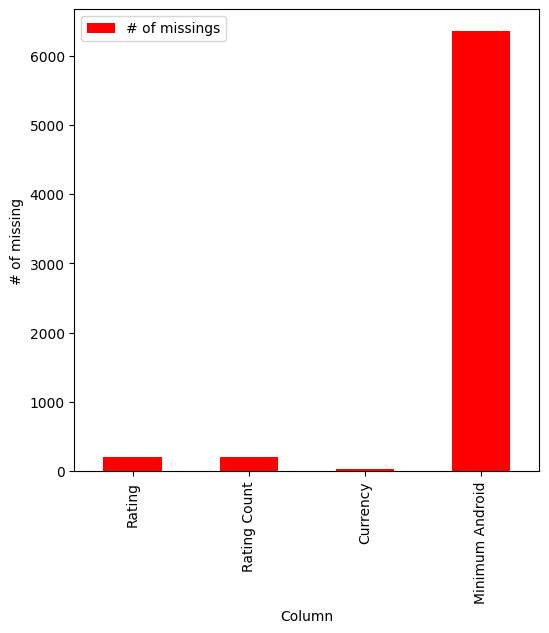

In [11]:
check_missing(df)

### Imputing missing values for the rest of columns

There is missing in data
            column  # of missings
0     Rating Count            208
1         Currency             33
2  Minimum Android           6352


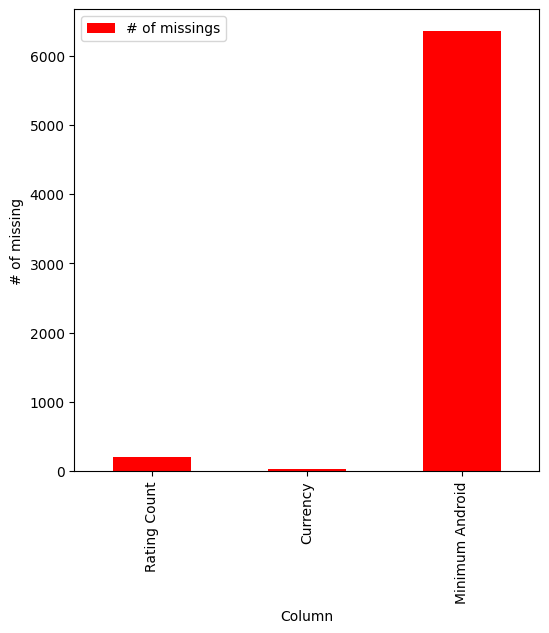

In [12]:
df["Rating"].fillna(df['Rating'].mean(), inplace = True)
check_missing(df)

There is missing in data
            column  # of missings
0         Currency             33
1  Minimum Android           6352


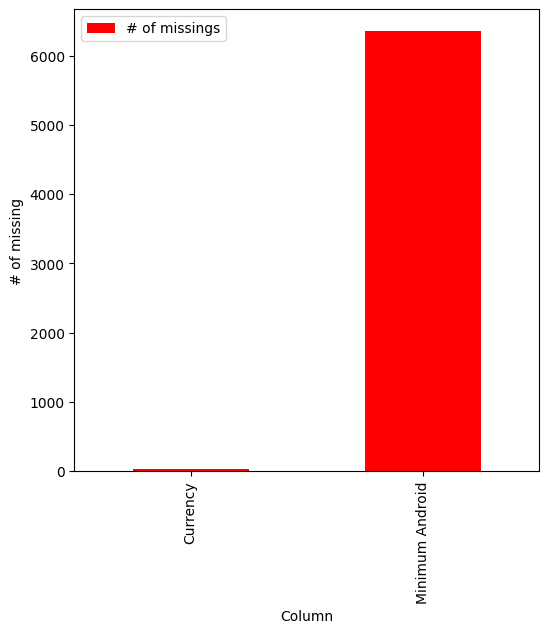

In [13]:
df["Rating Count"].fillna(df['Rating Count'].mean(), inplace = True)
check_missing(df)

There is missing in data
            column  # of missings
0  Minimum Android           6352


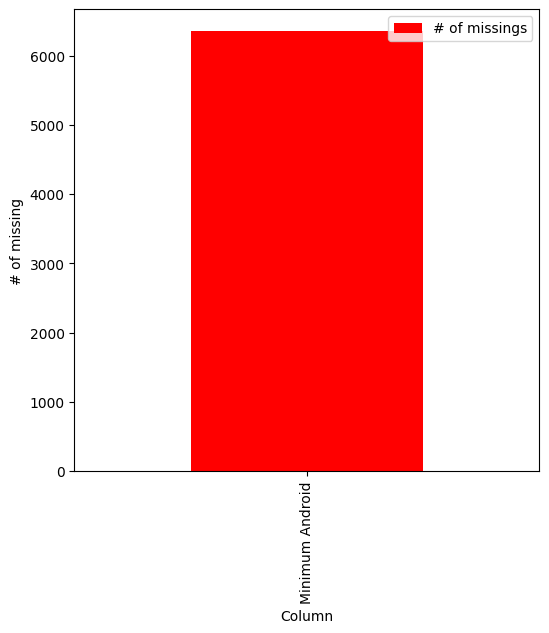

In [14]:
df["Currency"].fillna(df['Currency'].mode()[0], inplace = True)
check_missing(df)

In [15]:
df["Minimum Android"].fillna(df['Minimum Android'].mode()[0], inplace = True)
check_missing(df)

Data has no missing values


In [16]:
df.shape

(2241827, 19)

In [17]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count',
       'Maximum Installs', 'Free', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Email', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

### Check if there is any duplicates in the unique columns : App Id

In [18]:
def check_duplicated(df, column_name):
    duplicates_in_unique_column = df[df.duplicated(column_name)]
    duplicates_count = duplicates_in_unique_column.shape[0]
    if((duplicates_count) == 0) :
        print("There is no duplicated values in " + column_name)
    else:
        print(f"There is {duplicates_count} duplicated values in " + column_name)

In [19]:
check_duplicated(df, 'App Id')

There is no duplicated values in App Id


### Check that all values of the column has the same data type 

In [20]:
def Check_DataTypes(df):
    for col in df.columns :
        is_same_data_type = df[col].apply(lambda x: type(x)).nunique() == 1
        print(f"All values in '{col}' have the same data type: {is_same_data_type}")

In [21]:
Check_DataTypes(df)

All values in 'App Name' have the same data type: True
All values in 'App Id' have the same data type: True
All values in 'Category' have the same data type: True
All values in 'Rating' have the same data type: True
All values in 'Rating Count' have the same data type: True
All values in 'Maximum Installs' have the same data type: True
All values in 'Free' have the same data type: True
All values in 'Price' have the same data type: True
All values in 'Currency' have the same data type: True
All values in 'Size' have the same data type: True
All values in 'Minimum Android' have the same data type: True
All values in 'Developer Id' have the same data type: True
All values in 'Developer Email' have the same data type: True
All values in 'Released' have the same data type: True
All values in 'Last Updated' have the same data type: True
All values in 'Content Rating' have the same data type: True
All values in 'Ad Supported' have the same data type: True
All values in 'In App Purchases' hav

### Transform Released & Last Updated Columns to date type

In [22]:
df['Released']= pd.to_datetime(df['Released'])
df['Last Updated']= pd.to_datetime(df['Last Updated'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2241827 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Name          object        
 1   App Id            object        
 2   Category          object        
 3   Rating            float64       
 4   Rating Count      float64       
 5   Maximum Installs  int64         
 6   Free              bool          
 7   Price             float64       
 8   Currency          object        
 9   Size              object        
 10  Minimum Android   object        
 11  Developer Id      object        
 12  Developer Email   object        
 13  Released          datetime64[ns]
 14  Last Updated      datetime64[ns]
 15  Content Rating    object        
 16  Ad Supported      bool          
 17  In App Purchases  bool          
 18  Editors Choice    bool          
dtypes: bool(4), datetime64[ns](2), float64(3), int64(1), object(9)
memory usage: 282.2+ MB


### Check Size column

In [23]:
df['Size'].dtype

dtype('O')

In [24]:
df['Size']

0           10M
1          2.9M
2          3.7M
3          1.8M
4          6.2M
           ... 
2312938     10M
2312940     44M
2312941     29M
2312942     10M
2312943    5.2M
Name: Size, Length: 2241827, dtype: object

In [25]:
unique_size_units = df['Size'].str.extract(r'([a-zA-Z]+)').dropna()[0].unique().tolist()
unique_size_units

['M', 'k', 'Varies', 'G']

In [26]:
count_gb_occurrences = df['Size'].str.count('G').sum()

print("Number of occurrences of 'GB' in Size column:", count_gb_occurrences)


Number of occurrences of 'GB' in Size column: 12


In [27]:
count_kb_occurrences = df['Size'].str.count('k').sum()

print("Number of occurrences of 'k' in Size column:", count_kb_occurrences)

Number of occurrences of 'k' in Size column: 35268


In [28]:
count_varies_occurrences = df['Size'].str.count('Varies').sum()

print("Number of occurrences of 'Varies' in Size column:", count_varies_occurrences)

Number of occurrences of 'Varies' in Size column: 51246


In [29]:
count_mb_occurrences = df['Size'].str.count('M').sum()

print("Number of occurrences of 'M' in Size column:", count_mb_occurrences)

Number of occurrences of 'M' in Size column: 2155301


### Drop the 'Varies' rows while it 2.29% of the data & convert the size column to megabytes all

In [30]:
df = df[~df['Size'].str.contains('Varies')]
unique_size_units = df['Size'].str.extract(r'([a-zA-Z]+)').dropna()[0].unique().tolist()
unique_size_units

['M', 'k', 'G']

In [31]:
df['Size'] = df['Size'].str.replace("'", '')
df['Size'] = df['Size'].str.replace(",", '.')

In [32]:
def convert_to_megabytes(size):
    if 'G' in size:
        return (float(size.replace('G', ''))) * 1024
    elif 'M' in size:
        return (float(size.replace('M', '')))
    elif 'k' in size:
        return (float(size.replace('k', ''))) / 1024
    else:
        return None

In [33]:
df['Size'] = df['Size'].apply(convert_to_megabytes).astype(float)

In [34]:
df["Size"]

0          10.0
1           2.9
2           3.7
3           1.8
4           6.2
           ... 
2312938    10.0
2312940    44.0
2312941    29.0
2312942    10.0
2312943     5.2
Name: Size, Length: 2190581, dtype: float64

In [35]:
df.rename(columns = {'Size':'Size in MB'}, inplace = True)

### Sort tha data based on the app release date

In [36]:
df = df.sort_values(by=["Released"],ascending=True)
print("From "  + str(df["Released"].dt.date.min()) + " to " + str(df["Released"].dt.date.max()))

From 2010-01-28 to 2021-06-16


### Some EDA

In [37]:
summary_statistics =  df.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
summary_statistics

,Rating,Rating Count,Maximum Installs,Price,Size in MB,Released,Last Updated
count,2190581.000,2190581.000,2190581.000,2190581.000,2190581.000,2190581,2190581
mean,2.185,1979.025,191256.209,0.103,19.169,2018-09-08 02:31:11.487062528,2019-12-02 06:38:29.531945472
min,0.000,0.000,0.000,0.000,0.001,2010-01-28 00:00:00,2009-02-09 00:00:00
25%,0.000,0.000,83.000,0.000,4.900,2017-07-16 00:00:00,2019-04-12 00:00:00
50%,2.900,6.000,675.000,0.000,10.000,2019-03-28 00:00:00,2020-05-13 00:00:00
75%,4.300,39.000,6979.000,0.000,25.000,2020-04-19 00:00:00,2021-02-03 00:00:00
max,5.000,56025424.000,2123105347.000,400.000,1536.000,2021-06-16 00:00:00,2021-06-16 00:00:00
std,2.110,87859.953,5912996.621,2.664,23.955,NaN,NaN


In [38]:
df.shape

(2190581, 19)

In [39]:
unique_counts_multiple_columns = df[['App Id', 'Category', 'Currency','Developer Id','Content Rating']].nunique()
unique_counts_multiple_columns

App Id            2190581
Category               48
Currency               13
Developer Id       722231
Content Rating          6
dtype: int64

In [40]:
df['Category'].unique()

array(['Social', 'Travel & Local', 'Maps & Navigation',
       'Video Players & Editors', 'Sports', 'Books & Reference', 'Card',
       'Communication', 'Finance', 'Personalization', 'Arcade',
       'Entertainment', 'Medical', 'Business', 'Tools', 'Shopping',
       'News & Magazines', 'Productivity', 'Board', 'Photography',
       'Health & Fitness', 'Food & Drink', 'Lifestyle', 'Casual',
       'Music & Audio', 'Puzzle', 'House & Home', 'Adventure',
       'Education', 'Word', 'Weather', 'Dating', 'Role Playing', 'Action',
       'Auto & Vehicles', 'Casino', 'Libraries & Demo', 'Strategy',
       'Art & Design', 'Racing', 'Events', 'Parenting', 'Simulation',
       'Educational', 'Comics', 'Trivia', 'Beauty', 'Music'], dtype=object)

In [41]:
df['Currency'].unique()

array(['USD', 'EUR', 'TRY', 'GBP', 'INR', 'XXX', 'CAD', 'ZAR', 'BRL',
       'VND', 'SGD', 'KRW', 'AUD'], dtype=object)

In [42]:
df['Content Rating'].unique()

array(['Teen', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

## Lets get some insights 

### 1-Number of applications released over years

The Year with the highest apps released :  2020
The Year with the Lowest apps released :  2010


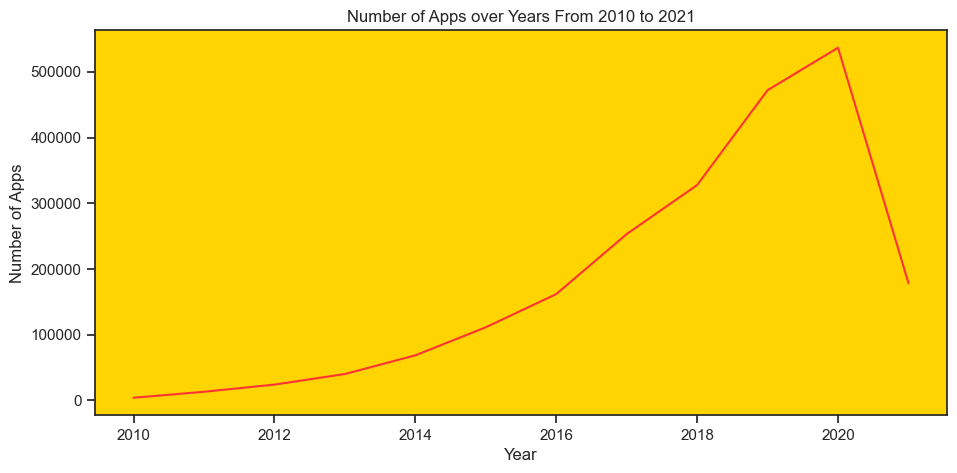

In [43]:
df['year'] = df['Released'].dt.year
count_apps = df.groupby(['year', 'App Id']).size().reset_index(name='Count')

apps_count_per_year = count_apps.groupby('year')['App Id'].nunique().reset_index(name='NumApps')

Highest_year = apps_count_per_year.loc[apps_count_per_year['NumApps'].idxmax(), 'year']
print("The Year with the highest apps released : ", Highest_year)

Lowest_year = apps_count_per_year.loc[apps_count_per_year['NumApps'].idxmin(), 'year']
print("The Year with the Lowest apps released : ", Lowest_year)

plt.figure(figsize=(11, 5))
sns.set(style="ticks", rc={'axes.facecolor':'#FFD400'})
sns.lineplot(x='year', y='NumApps', data=apps_count_per_year, color='#FF3333')
plt.title('Number of Apps over Years From 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.show()


### 2-Distribution of the number of applications over categories

Category with the Highest Number of Apps: Education
Category with the Lowest Number of Apps: Comics
                   Category  NumAppsPerCategory
12                   Comics                2622
30                Parenting                3525
27                    Music                4001
10                   Casino                4678
23         Libraries & Demo                4690
14                   Dating                6136
46                  Weather                6476
9                      Card                7325
41                 Strategy                7755
47                     Word                8092
36             Role Playing                8700
35                   Racing                9713
6                     Board                9949
44                   Trivia               11265
5                    Beauty               11372
18                   Events               11985
45  Video Players & Editors               13246
22             House & Home         

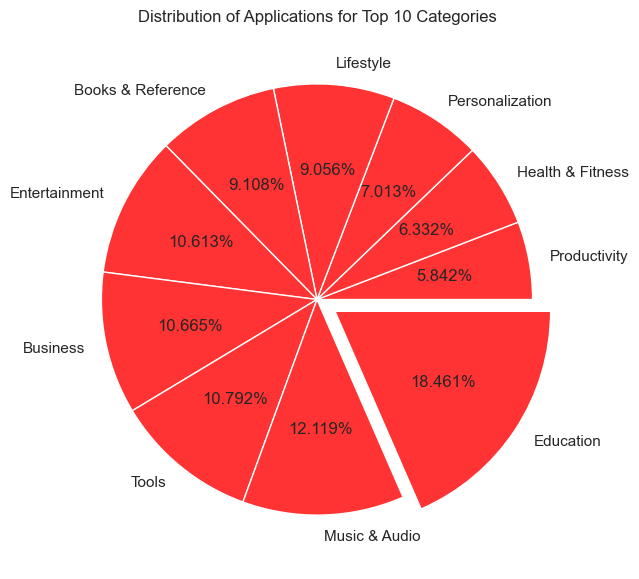

In [44]:
app_category_count = df.groupby(['Category', 'App Id']).size().reset_index(name='app_category_count')

app_category_count = app_category_count.groupby('Category')['App Id'].nunique().reset_index(name='NumAppsPerCategory')



max_category_apps = app_category_count.loc[app_category_count['NumAppsPerCategory'].idxmax(), 'Category']
min_category_apps = app_category_count.loc[app_category_count['NumAppsPerCategory'].idxmin(), 'Category']
print("Category with the Highest Number of Apps:", max_category_apps)
print("Category with the Lowest Number of Apps:", min_category_apps)

apps_count_per_category = app_category_count.sort_values(by = "NumAppsPerCategory",ascending=True)
print(apps_count_per_category)

top10_categories = apps_count_per_category[-10:]
print("Top 10 Category: ")
print(top10_categories)

plt.figure(figsize=(12, 7))
colors = ['#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333']
explode = [0.1 if year == max_category_apps else 0 for year in top10_categories['Category']]
plt.pie(top10_categories['NumAppsPerCategory'], labels=top10_categories['Category'], autopct='%1.3f%%', explode=explode, colors=colors)
plt.title('Distribution of Applications for Top 10 Categories')
plt.show()

### 3- Top Categories with the highest avg rate

                   Category  Rating
12                   Comics   2.813
41                 Strategy   2.836
47                     Word   2.870
45  Video Players & Editors   2.890
35                   Racing   2.932
9                      Card   3.029
46                  Weather   3.074
38               Simulation   3.192
10                   Casino   3.249
36             Role Playing   3.358


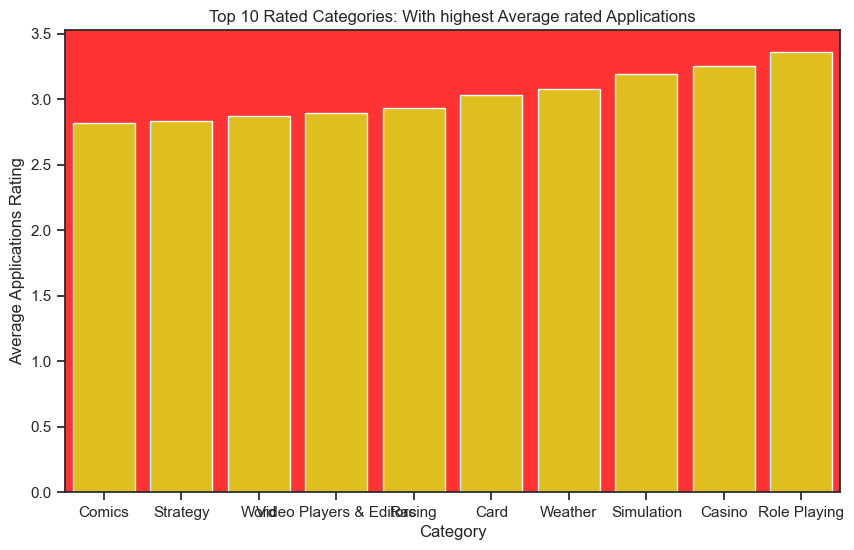

In [45]:
top10_categories = df[['Category','App Id','Rating']]
top10_categories_average_rating = top10_categories.groupby('Category')['Rating'].mean().reset_index()
top10_categories_average_rating_sorted = top10_categories_average_rating.sort_values(by = "Rating",ascending=True)
top10_categories_average_rating_sorted = top10_categories_average_rating_sorted[-10:]
print(top10_categories_average_rating_sorted)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'#FF3333'})
sns.barplot(x='Category', y='Rating', data=top10_categories_average_rating_sorted, color="#FFD400")

plt.title('Top 10 Rated Categories: With highest Average rated Applications')
plt.xlabel('Category')
plt.ylabel('Average Applications Rating')

plt.show()


### 4-The most and least rated applications

In [46]:
top_rated_apps = df[['App Name','Rating']]
top_rated_apps_sorted = top_rated_apps.sort_values(by='Rating',ascending = True)
top_rated_apps_sorted[-10:]

,App Name,Rating
271946,HD Wallpapers ( Backgrounds ),5.000
1857428,nimat,5.000
1529456,AR-3D Lion,5.000
526664,Purple Love Couple Theme,5.000
817298,Falling Star,5.000
531339,Romantic Photo Frame,5.000
2003622,అంతిమ దైవ గ్రంథములో జ్ఞాన వాక్యములు,5.000
1850313,Sesame - Account Manager,5.000
2089533,Voucher PG,5.000
1412078,Key Women in Business Magazine,5.000


### 5-The Most and Least Installed Applications

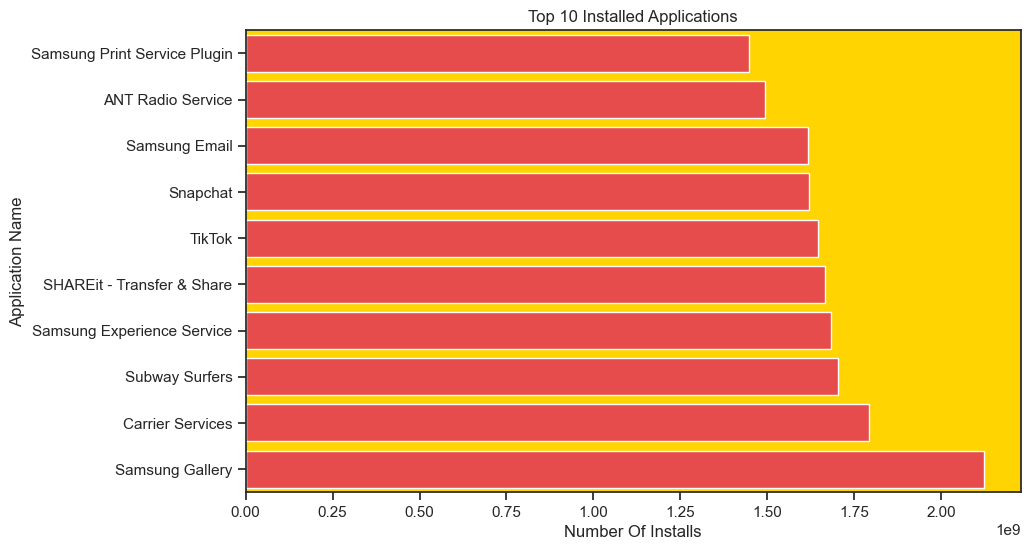

In [47]:
top_Installed_apps = df[['App Name','Maximum Installs']]
top_Installed_apps_sorted = top_Installed_apps.sort_values(by='Maximum Installs',ascending = True)
top_Installed_apps_sorted[-10:]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'#FFD400'})
sns.barplot(x='Maximum Installs', y='App Name', data=top_Installed_apps_sorted[-10:], color="#FF3333")

plt.title('Top 10 Installed Applications')
plt.xlabel('Number Of Installs')
plt.ylabel('Application Name')

plt.show()

### 6-Distribution of Free & Paid Applications

([<matplotlib.patches.Wedge at 0x26bae27a060>,
 [Text(-1.0980070489166631, 0.0661855008995239, 'Free'),
  Text(1.0980070527896197, -0.06618543664774955, 'Paid')],
 [Text(-0.5989129357727252, 0.036101182308831206, '98.1%\n2148601'),
  Text(0.5989129378852471, -0.03610114726240884, '1.9%\n41980')])

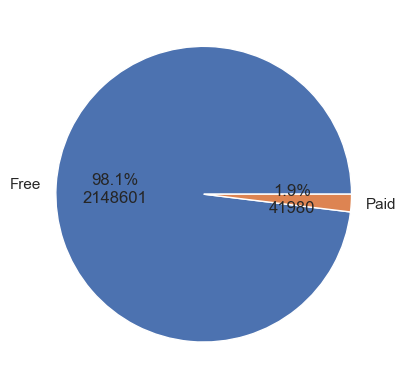

In [48]:
distributionOFPaidandFree = df.value_counts('Free')
total = distributionOFPaidandFree.values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
    
plt.pie(distributionOFPaidandFree,labels = ['Free','Paid'], autopct=fmt)

### 7-Highest Paid Applications and the Average Price

Average Price of The Paid Applications: 5.366376228989996 $ 


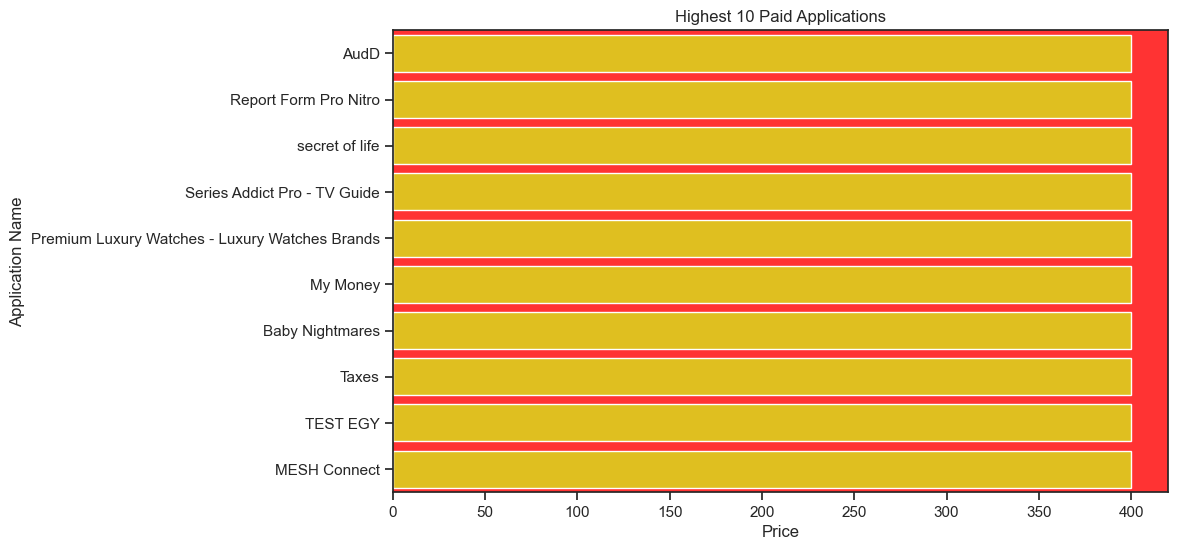

In [49]:
Highest_Paid_Apps = df[df['Free'] == False]
Highest_Paid_Apps = Highest_Paid_Apps[['App Name','Price']]
Highest_Paid_Apps_sorted = Highest_Paid_Apps.sort_values(by='Price',ascending = True)
Highest_Paid_Apps_sorted[-10:]
Average_Applications_Price = Highest_Paid_Apps['Price'].mean()
print(f"Average Price of The Paid Applications: {Average_Applications_Price} $ ")
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'#FF3333'})
sns.barplot(x='Price', y='App Name', data=Highest_Paid_Apps_sorted[-10:], color="#FFD400")

plt.title('Highest 10 Paid Applications')
plt.xlabel('Price')
plt.ylabel('Application Name')

plt.show()

### 8-Correlation between the Price adn the rating

In [50]:
correlation = df["Price"].corr(df["Rating"])

correlation 

-0.004289685443296659

<Axes: xlabel='Rating', ylabel='Price'>

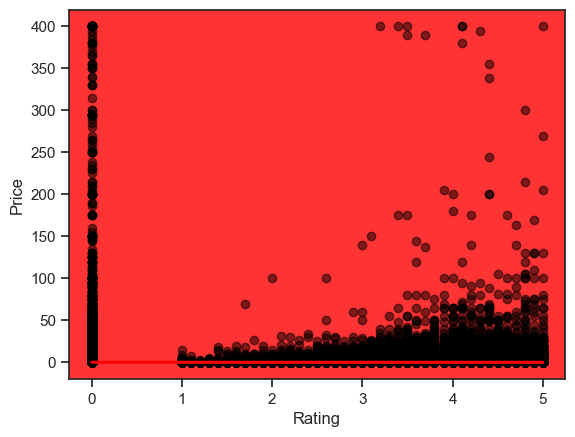

In [51]:
sns.regplot(x = df.Rating, y = df.Price,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"}) 

### 9-The distribution of Applications sizes

The minimum application size: 0.0009765625 MB
The maximum application size: 1536.0 MB
The average application size: 19.16919066262683 MB
SizeRange
A    2190404
B        133
C         42
D          2
Name: count, dtype: int64


<Axes: xlabel='SizeRange', ylabel='count'>

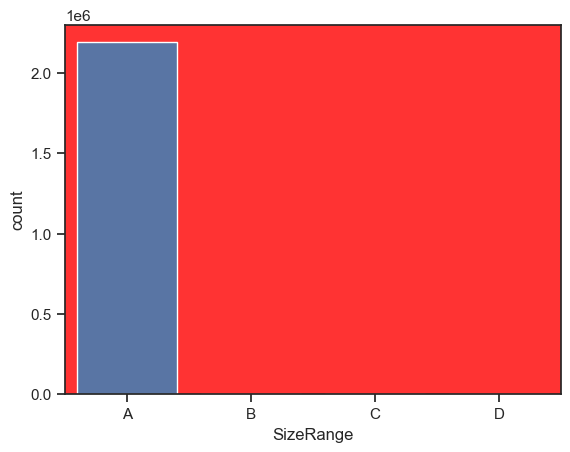

In [52]:
print(f"The minimum application size: {df['Size in MB'].min()} MB")
print(f"The maximum application size: {df['Size in MB'].max()} MB")
print(f"The average application size: {df['Size in MB'].mean()} MB")
"""
Divide Application sizes into 4 sectors : 
a : 0 -- > 400 MB
b : 400 -- > 800 MB
c : 800 -- > 1200 MB
d : 1200 -- > 1600 MB
"""
df["SizeRange"] = pd.cut(x=df['Size in MB'], bins=[0, 400, 800, 1200 , 1600], labels=['A', 'B', 'C', 'D'], right=False)
distributionOfSizes = df.value_counts("SizeRange")
print(distributionOfSizes)
total_sizes = distributionOfSizes.values.sum()
def fmt(x):
    return '{:.3f}%\n{:.0f}'.format(x, total*x/100)
    
sns.barplot(distributionOfSizes)

### 10-Correlation between the Application Size and the rating

The Correlation Coeff =  0.05341825222728175


<Axes: xlabel='Size in MB', ylabel='Rating'>

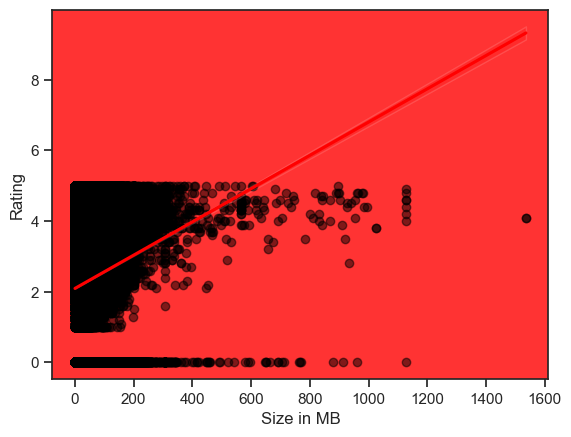

In [53]:
correlation = df["Size in MB"].corr(df["Rating"])

print("The Correlation Coeff = ", correlation)
sns.regplot(x = df["Size in MB"], y = df.Rating,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"}) 

### 11-Top Developers with # of applications

Developer Id
CyJ Studio                1741
OrderYOYO                 1871
J&M Studio                1942
Flipdish                  1969
Sharefaith                2076
BH App Development Ltd    2453
Phorest                   2821
ChowNow                   4865
TRAINERIZE                5153
Subsplash Inc             5422
Name: count, dtype: int64


<Axes: xlabel='Number of Applications', ylabel='Developer Id'>

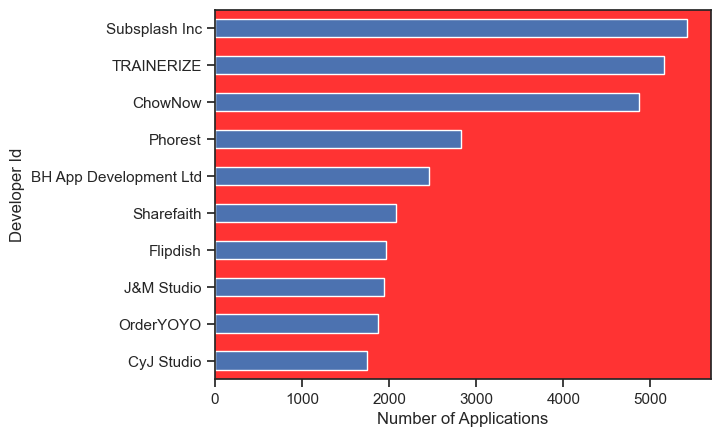

In [54]:
distributionOfDevelopers = df.value_counts("Developer Id", ascending=True)
top_10_developers = distributionOfDevelopers[-10:]
print(top_10_developers)
top_10_developers.plot(kind='barh', xlabel='Number of Applications', ylabel='Developer Id')

### 12-Top developers with best average applications rating

                  Developer Id  Rating
3002           Branches Studio   4.925
17823              Valer BOCAN   4.925
17625          United Apps Hub   4.950
8385           Innovative beat   5.000
14511       SAGAMILL PTE. LTD.   5.000
2145             BIG DATATRACE   5.000
18217                  WNSApps   5.000
14578              SHAHID KHAN   5.000
2546   Best Brick Puzzle Games   5.000
3926    Cool Bean Games Studio   5.000


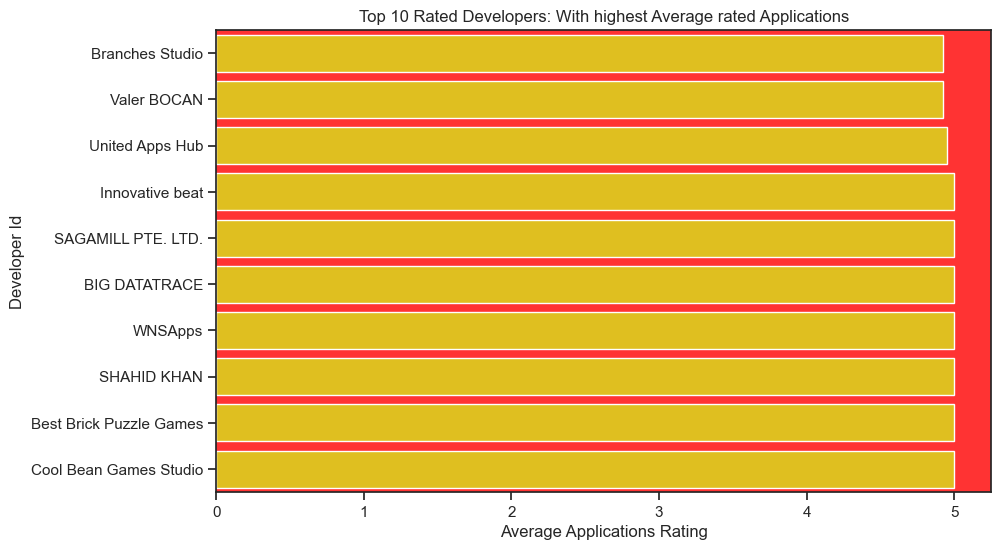

In [55]:
mean_number_of_apps = df['Developer Id'].value_counts(ascending=False).mean()
mean_number_of_ratings = df['Rating Count'].mean()
top10_developers = df[df['Developer Id'].map(df['Developer Id'].value_counts()) >= int(mean_number_of_apps)]
top10_developers = top10_developers[top10_developers['Rating Count'] >= int(mean_number_of_ratings)]
top10_developers = top10_developers[['Developer Id','App Id','Rating']]
top10_developers_average_rating = top10_developers.groupby('Developer Id')['Rating'].mean().reset_index()
top10_developers_average_rating_sorted = top10_developers_average_rating.sort_values(by = "Rating",ascending=True)
top10_developers_average_rating_sorted = top10_developers_average_rating_sorted[-10:]
print(top10_developers_average_rating_sorted)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'#FF3333'})
sns.barplot(x='Rating', y='Developer Id', data=top10_developers_average_rating_sorted, color="#FFD400")

plt.title('Top 10 Rated Developers: With highest Average rated Applications')
plt.xlabel('Average Applications Rating')
plt.ylabel('Developer Id')

plt.show()


### 13- Applications Not updated from long time

In [56]:
df.shape[0]

2190581

In [57]:
import datetime

today = datetime.datetime(2021,6,17)

def parse_date(td):
    resYear = float(td.days)/364.0                   # get the number of years including the the numbers after the dot
    resMonth = int((resYear - int(resYear))*364/30)  # get the number of months, by multiply the number after the dot by 364 and divide by 30.
    resYear = float(resYear)
    #return str(resYear) + "Y" + str(resMonth) + "m"
    return resYear

df["Duration_from_last_updated"] = today - df["Last Updated"]
df['Duration_from_last_updated'] = df['Duration_from_last_updated'].apply(lambda x: parse_date(x))
Last_Updated_Applications = df[['App Name','Duration_from_last_updated']].sort_values(by='Duration_from_last_updated', ascending=True)
Last_Updated_Applications[-10:]

,App Name,Duration_from_last_updated
542850,I Ching Pro Upgrade Key,11.316
96759,Simple Tip Calculator,11.319
661479,Noise Canceller,11.343
1636874,Jewish Books Rambam Yad Hazaka,11.363
1931616,Mandelbrot Wallpaper,11.385
1353735,Dynamic Ring,11.415
536940,Environmental Terms Dict. J-E,11.451
671839,Civil Engineering Dict. (J-E),11.451
210596,Noise and Sweep Generator,11.654
782134,Spin the Bottle,12.393


### 14-Distribution of applications across content-rating

Content-rating with the Highest Number of Apps: Everyone
Content-rating with the Lowest Number of Apps: Adults only 18+
    Content Rating  NumAppsPerContentRating
0  Adults only 18+                      130
5          Unrated                      149
2     Everyone 10+                    31206
3       Mature 17+                    57354
4             Teen                   184674
1         Everyone                  1917068
Top 10 Content Rating: 
    Content Rating  NumAppsPerContentRating
0  Adults only 18+                      130
5          Unrated                      149
2     Everyone 10+                    31206
3       Mature 17+                    57354
4             Teen                   184674
1         Everyone                  1917068


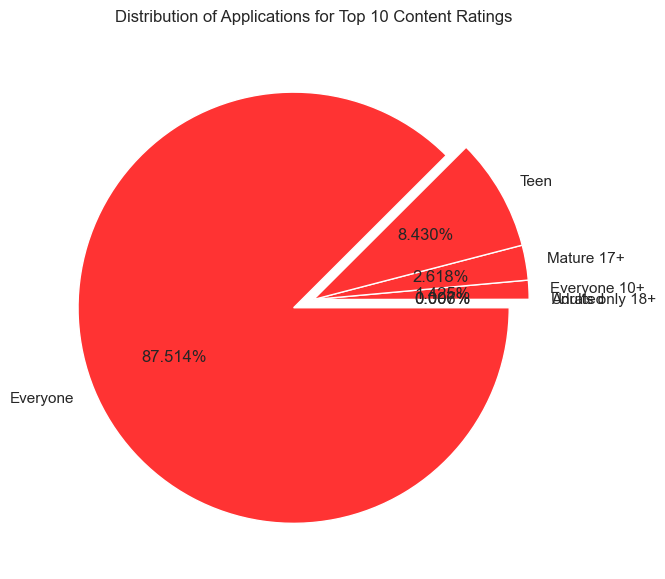

In [59]:
app_Content_Rating_count = df.groupby(['Content Rating', 'App Id']).size().reset_index(name='app_Content_Rating_count')

app_Content_Rating_count = app_Content_Rating_count.groupby('Content Rating')['App Id'].nunique().reset_index(name='NumAppsPerContentRating')



max_Content_rating_apps = app_Content_Rating_count.loc[app_Content_Rating_count['NumAppsPerContentRating'].idxmax(), 'Content Rating']
min_Content_rating_apps = app_Content_Rating_count.loc[app_Content_Rating_count['NumAppsPerContentRating'].idxmin(), 'Content Rating']
print("Content-rating with the Highest Number of Apps:", max_Content_rating_apps)
print("Content-rating with the Lowest Number of Apps:", min_Content_rating_apps)

apps_content_rating_per_category = app_Content_Rating_count.sort_values(by = "NumAppsPerContentRating",ascending=True)
print(apps_content_rating_per_category)

top10_centent_rating = apps_content_rating_per_category[-10:]
print("Top 10 Content Rating: ")
print(top10_centent_rating)

plt.figure(figsize=(12, 7))
colors = ['#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333','#FF3333']
explode = [0.1 if year == max_Content_rating_apps else 0 for year in top10_centent_rating['Content Rating']]
plt.pie(top10_centent_rating['NumAppsPerContentRating'], labels=top10_centent_rating['Content Rating'], autopct='%1.3f%%', explode=explode, colors=colors)
plt.title('Distribution of Applications for Top 10 Content Ratings')
plt.show()